In [1]:
import cartopy.crs as ccrs
import cartopy
import datetime as dt
import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import netCDF4
import numpy as np
import os
import imageio

In [2]:
exp_dir = '/glade/u/home/afox/work/jedi/Jedi_experiments/workflow/expts/march_021'

In [3]:
geom_file = '/glade/work/afox/jedi/Jedi_experiments/input/wrf_hydro_nwm_files/colorado/geometry_nwm_long_range_snow.nc'

print('\nOpening ', geom_file, 'for reading')
ncfile = netCDF4.Dataset(geom_file, mode='r')
# Get metadata from the file
npx = ncfile.dimensions["west_east"].size
npy = ncfile.dimensions["south_north"].size
npz = 1
lons = ncfile.variables["XLONG"][:]
lats = ncfile.variables["XLAT"][:]
# Print field dimensions
print(" Grid dimensions", npx, 'x', npy, 'x', npz)



Opening  /glade/work/afox/jedi/Jedi_experiments/input/wrf_hydro_nwm_files/colorado/geometry_nwm_long_range_snow.nc for reading
 Grid dimensions 487 x 493 x 1



Opening  /glade/u/home/afox/work/jedi/Jedi_experiments/workflow/expts/march_021/letkf_inc.lsm.ens.0.2021-03-01T00:00:00Z.PT0S for reading
 Saving figure as ./pngs/Increment_March_21_2021-03-01T00:00:00_inc.png 


Opening  /glade/u/home/afox/work/jedi/Jedi_experiments/workflow/expts/march_021/letkf_inc.lsm.ens.0.2021-03-02T00:00:00Z.PT0S for reading
 Saving figure as ./pngs/Increment_March_21_2021-03-02T00:00:00_inc.png 


Opening  /glade/u/home/afox/work/jedi/Jedi_experiments/workflow/expts/march_021/letkf_inc.lsm.ens.0.2021-03-03T00:00:00Z.PT0S for reading
 Saving figure as ./pngs/Increment_March_21_2021-03-03T00:00:00_inc.png 


Opening  /glade/u/home/afox/work/jedi/Jedi_experiments/workflow/expts/march_021/letkf_inc.lsm.ens.0.2021-03-04T00:00:00Z.PT0S for reading
 Saving figure as ./pngs/Increment_March_21_2021-03-04T00:00:00_inc.png 


Opening  /glade/u/home/afox/work/jedi/Jedi_experiments/workflow/expts/march_021/letkf_inc.lsm.ens.0.2021-03-05T00:00:00Z.PT0S for reading
 Saving f

/glade/u/home/afox/.conda/envs/xr/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


 Saving figure as ./pngs/Increment_March_21_2021-03-21T00:00:00_inc.png 


Opening  /glade/u/home/afox/work/jedi/Jedi_experiments/workflow/expts/march_021/letkf_inc.lsm.ens.0.2021-03-22T00:00:00Z.PT0S for reading
 Saving figure as ./pngs/Increment_March_21_2021-03-22T00:00:00_inc.png 


Opening  /glade/u/home/afox/work/jedi/Jedi_experiments/workflow/expts/march_021/letkf_inc.lsm.ens.0.2021-03-23T00:00:00Z.PT0S for reading
 Saving figure as ./pngs/Increment_March_21_2021-03-23T00:00:00_inc.png 


Opening  /glade/u/home/afox/work/jedi/Jedi_experiments/workflow/expts/march_021/letkf_inc.lsm.ens.0.2021-03-24T00:00:00Z.PT0S for reading
 Saving figure as ./pngs/Increment_March_21_2021-03-24T00:00:00_inc.png 


Opening  /glade/u/home/afox/work/jedi/Jedi_experiments/workflow/expts/march_021/letkf_inc.lsm.ens.0.2021-03-25T00:00:00Z.PT0S for reading
 Saving figure as ./pngs/Increment_March_21_2021-03-25T00:00:00_inc.png 


Opening  /glade/u/home/afox/work/jedi/Jedi_experiments/workflow/expts/mar

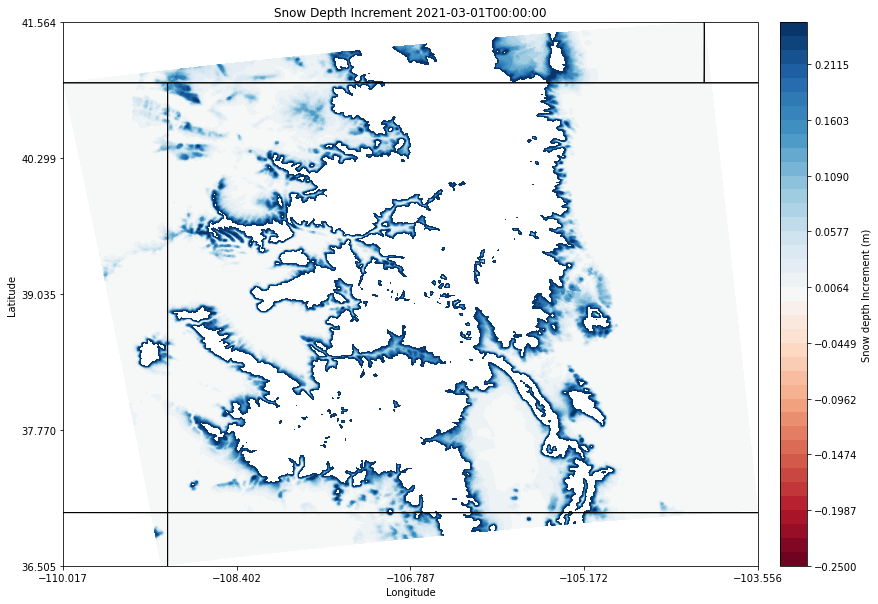

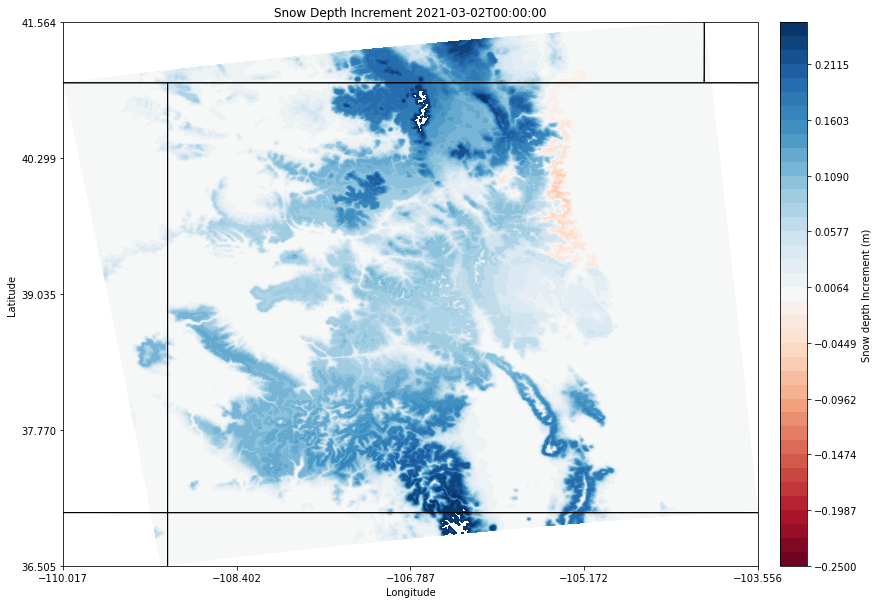

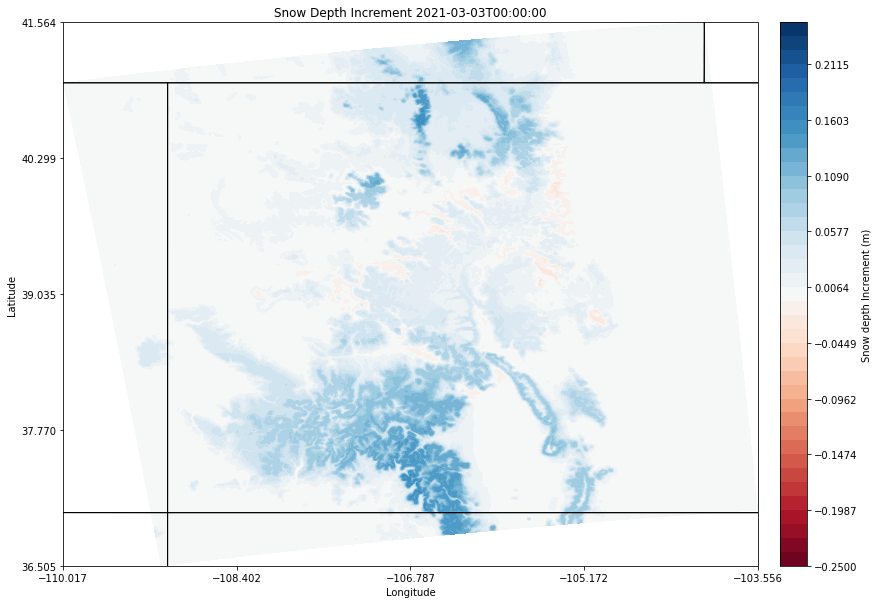

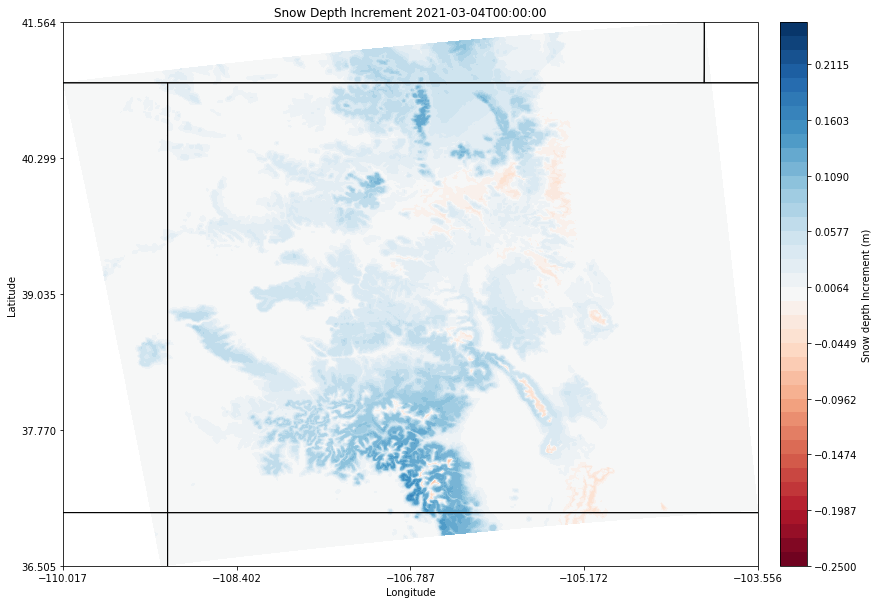

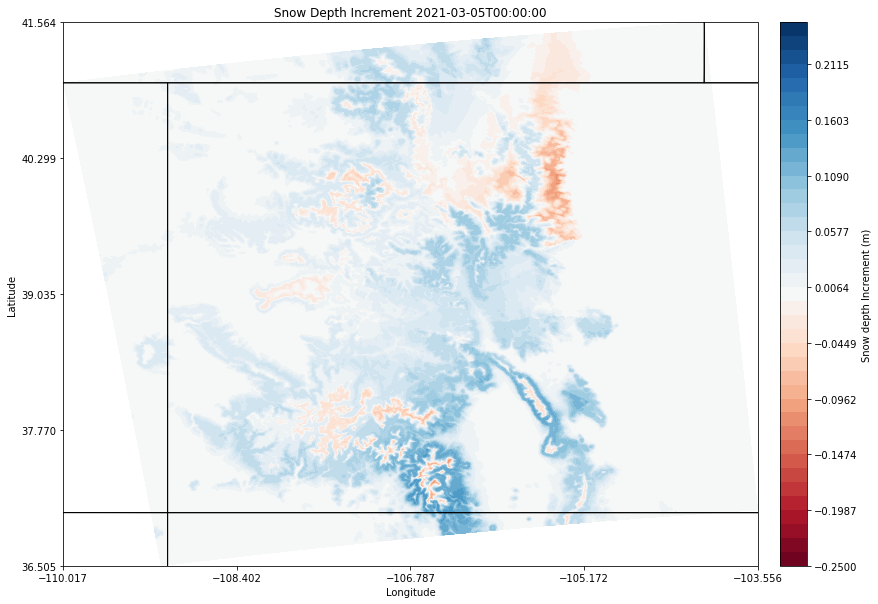

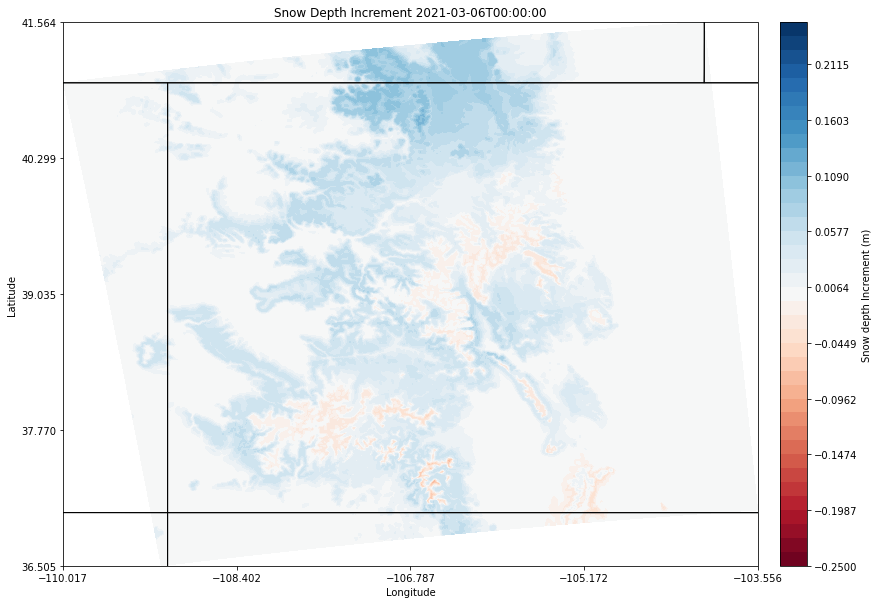

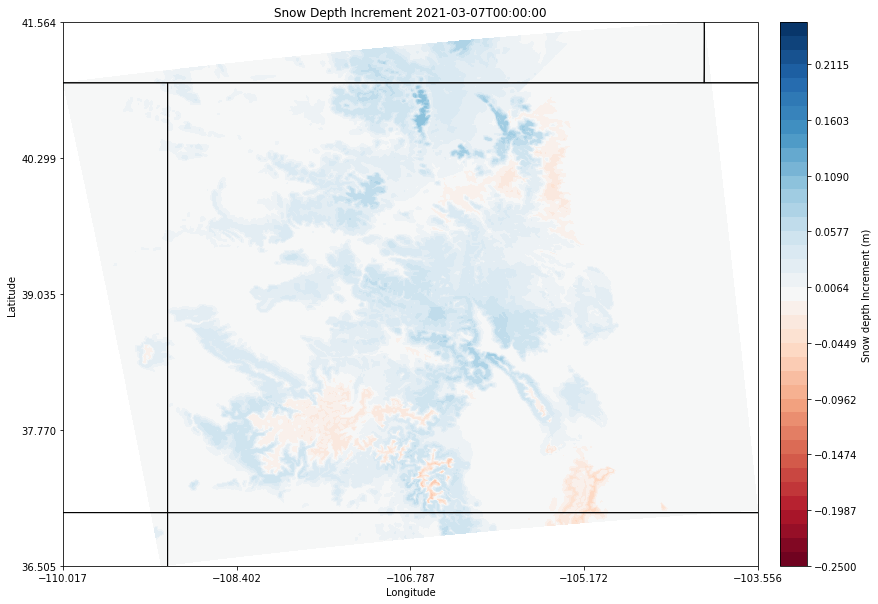

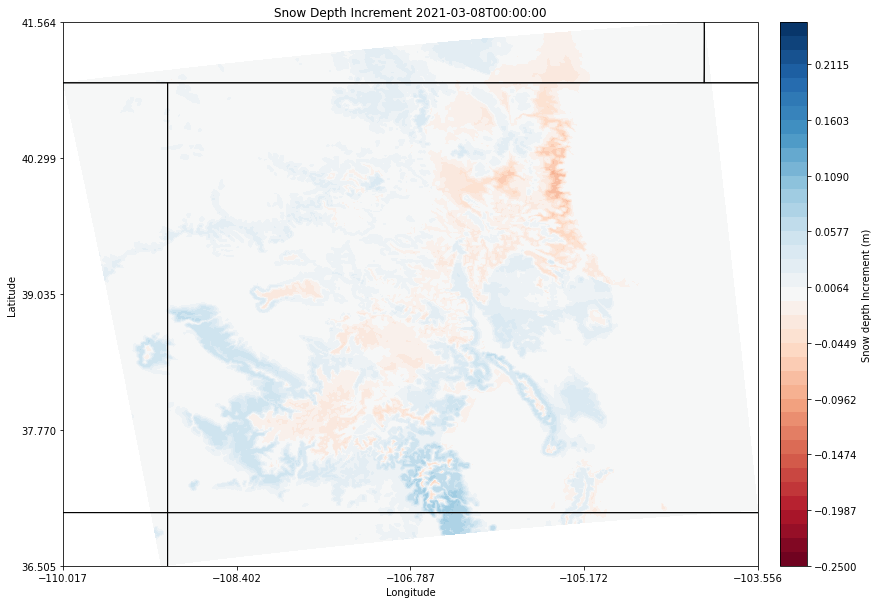

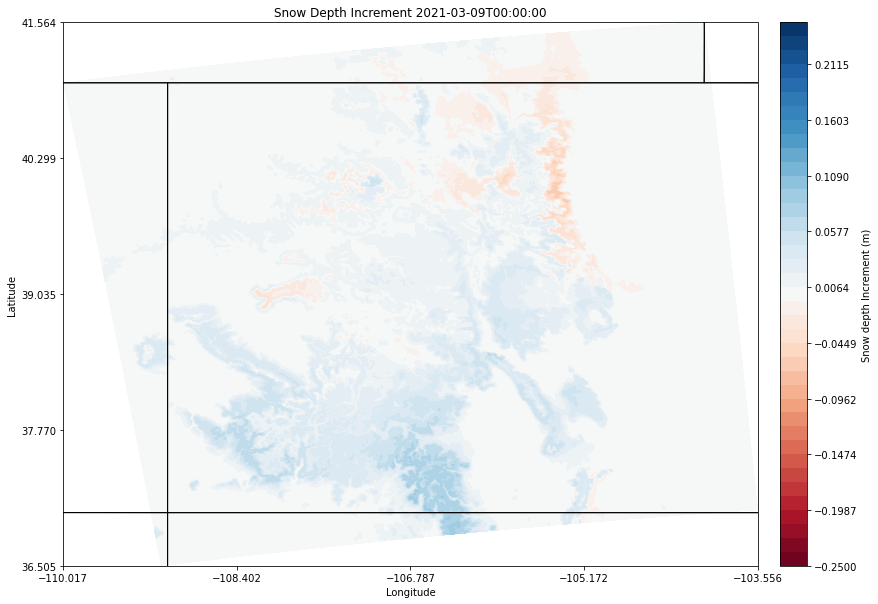

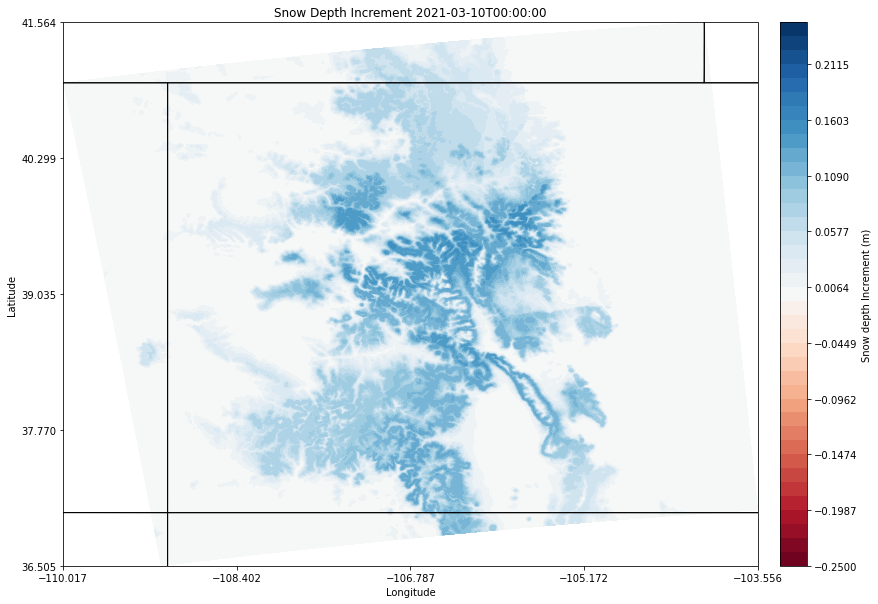

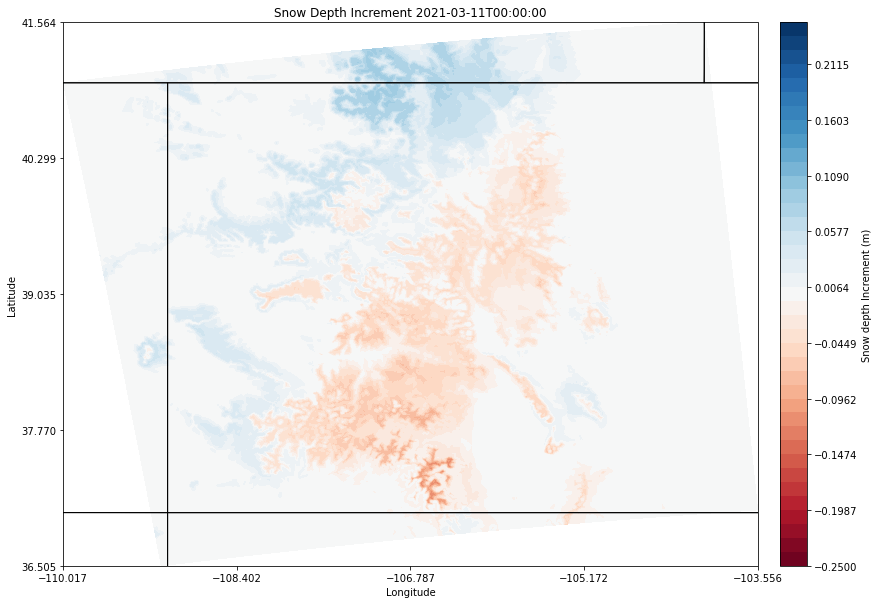

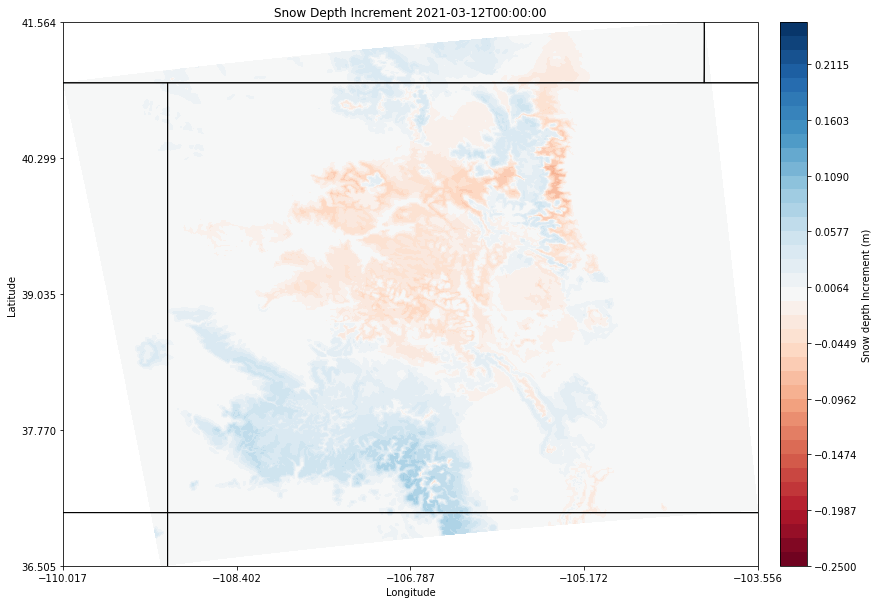

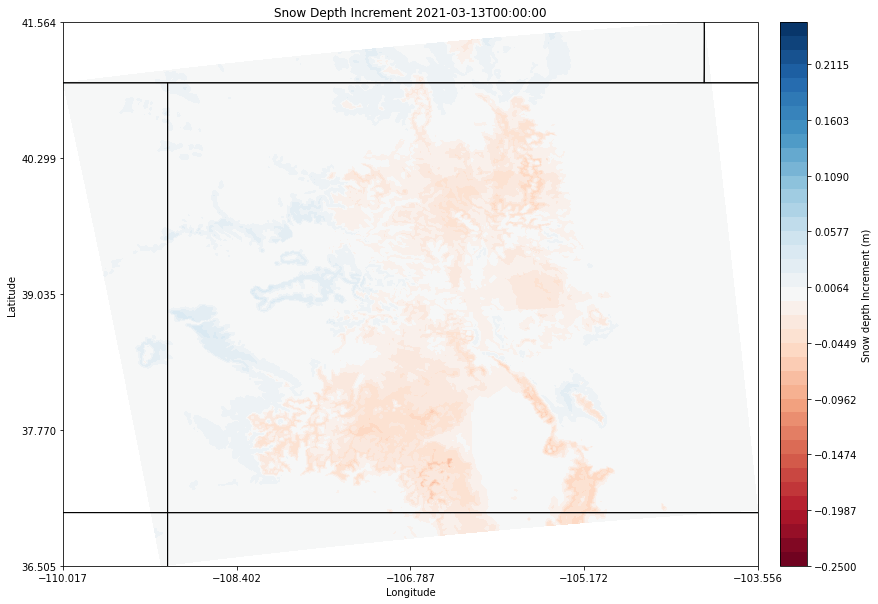

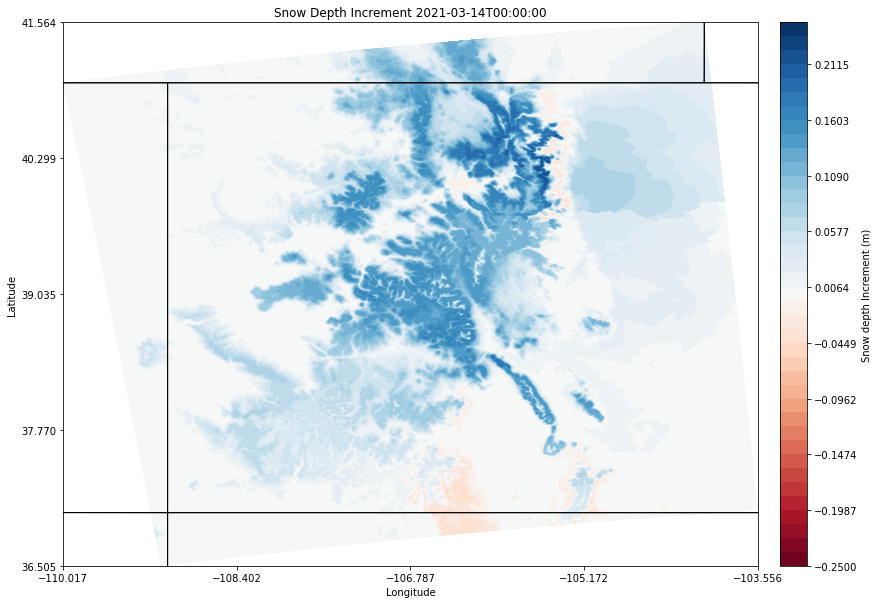

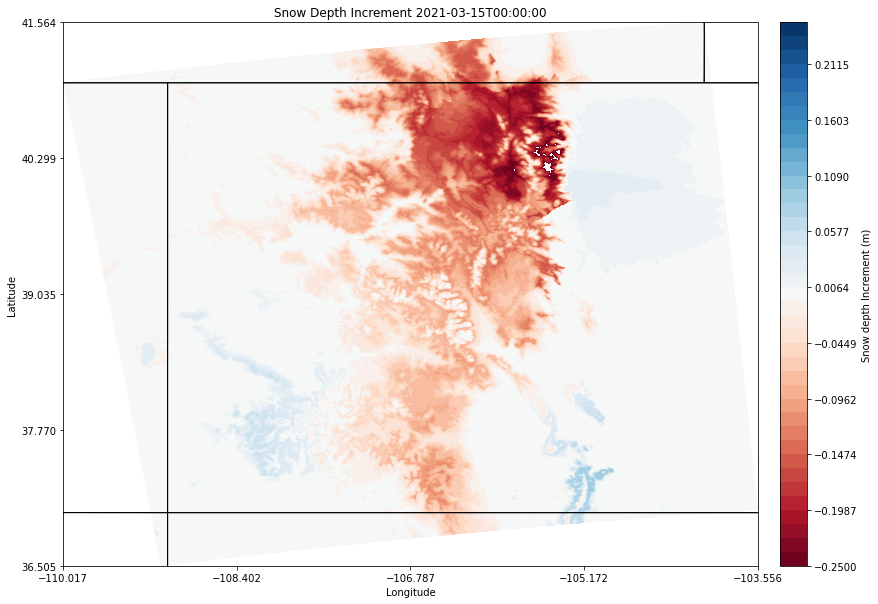

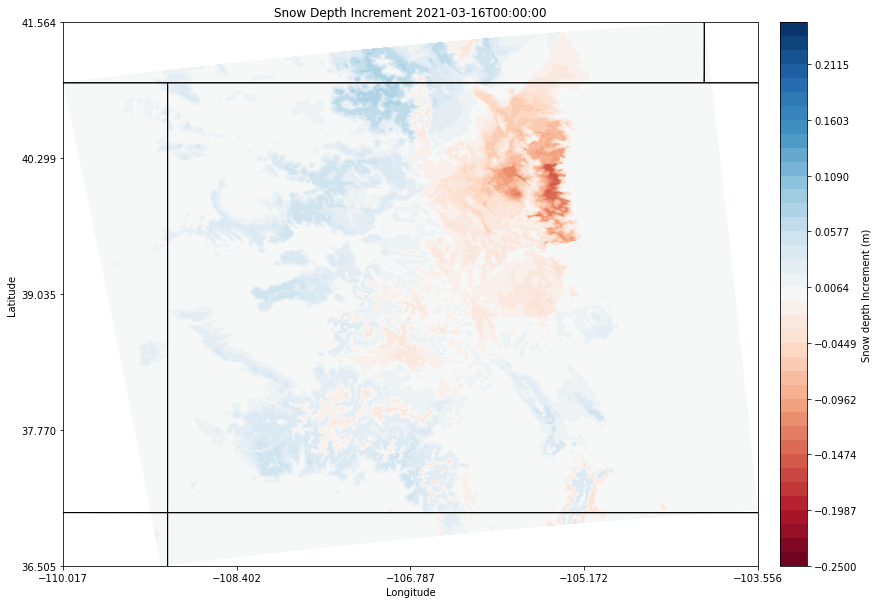

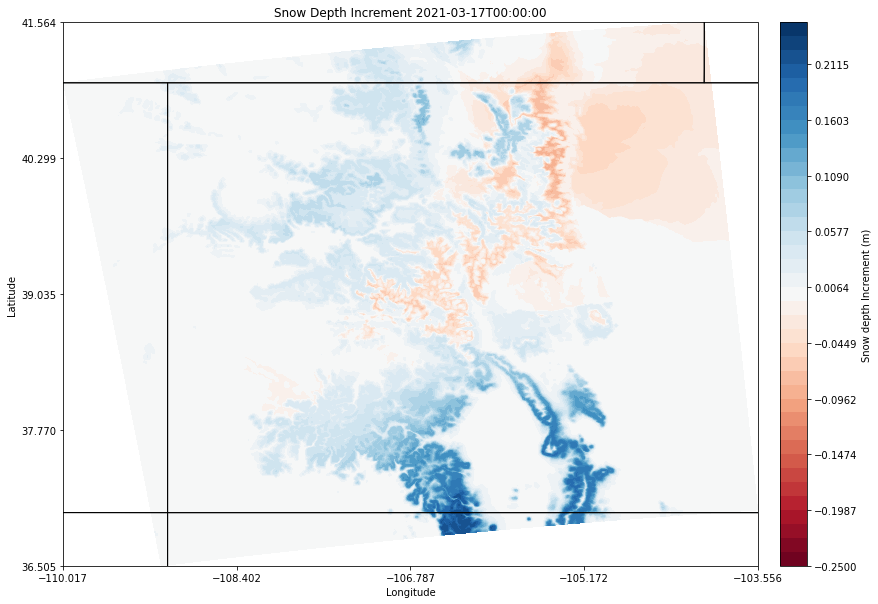

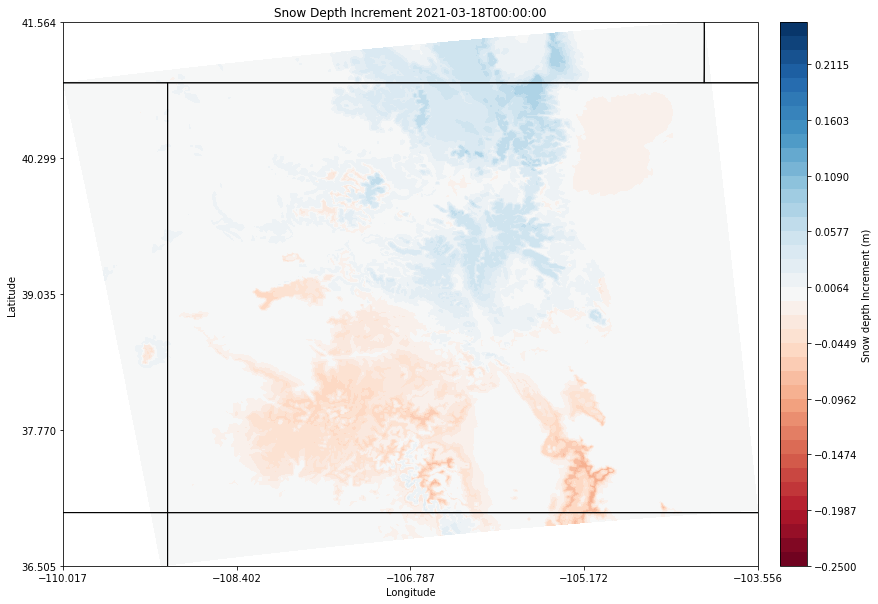

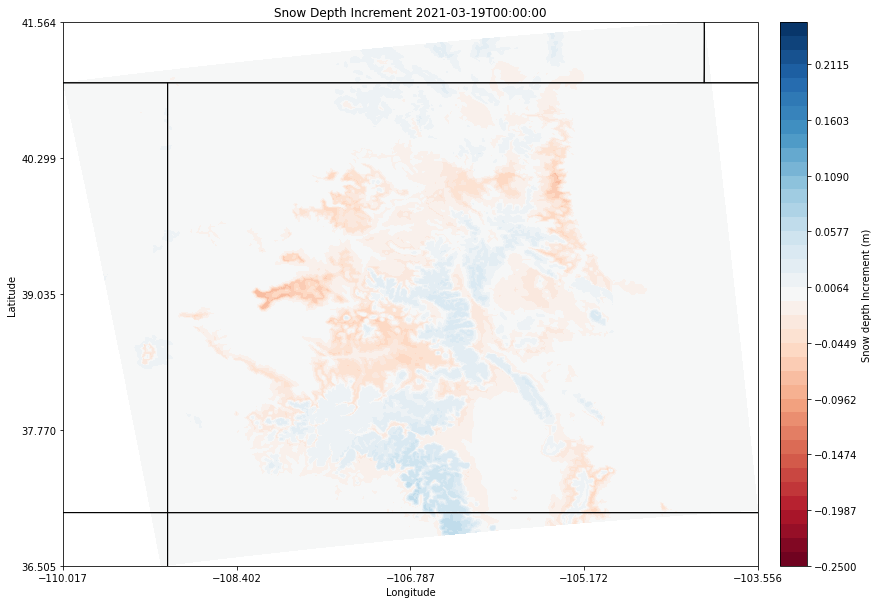

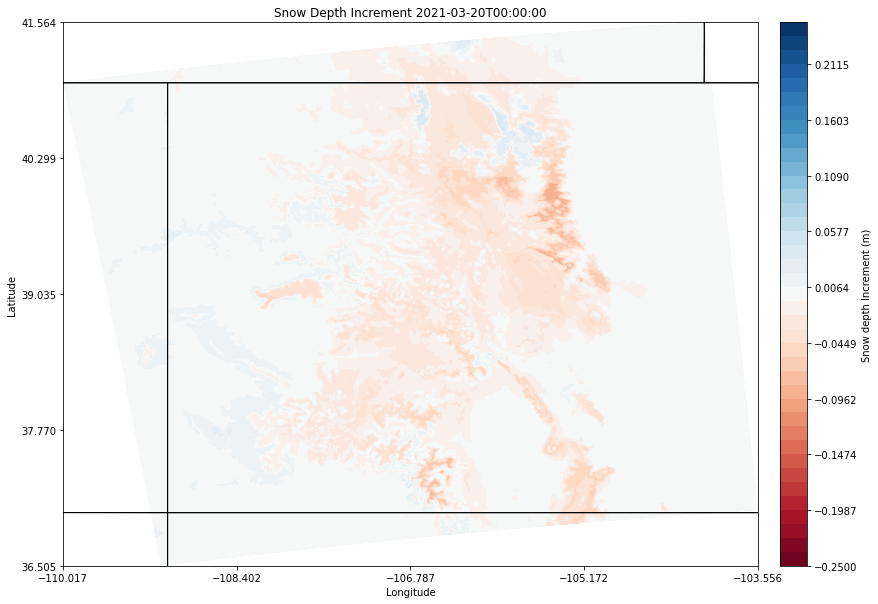

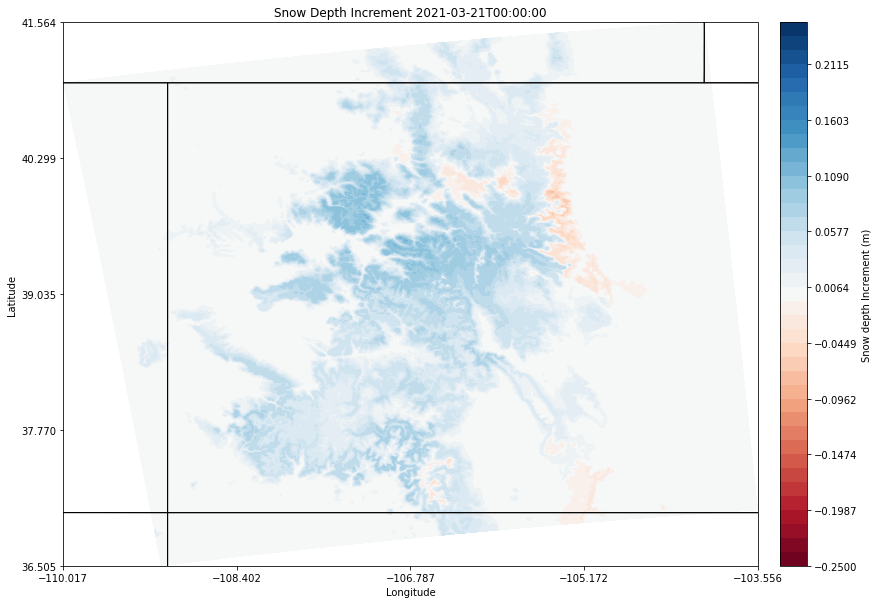

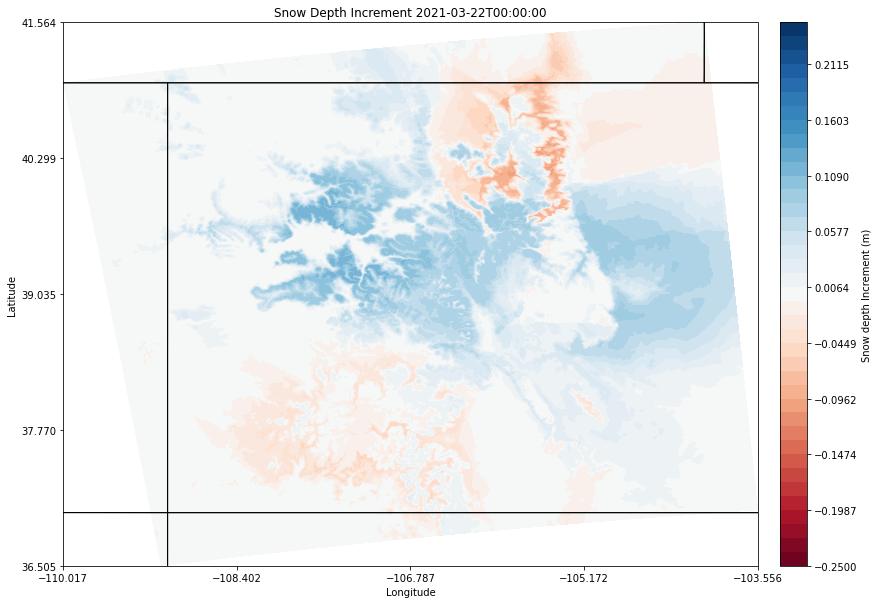

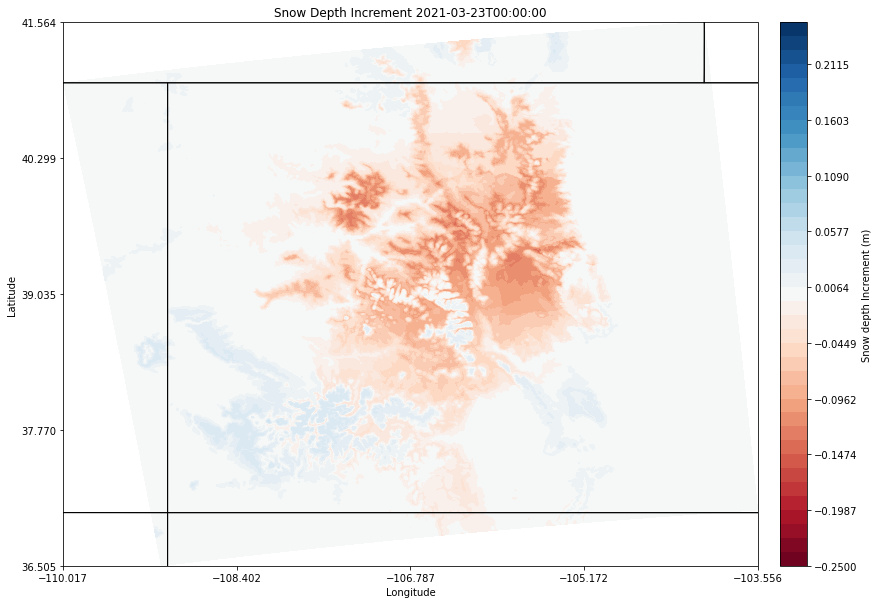

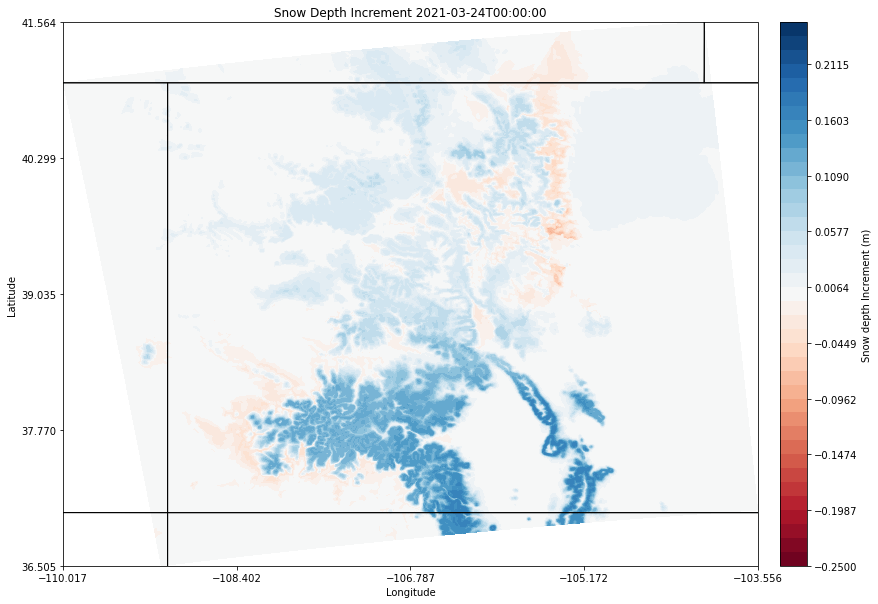

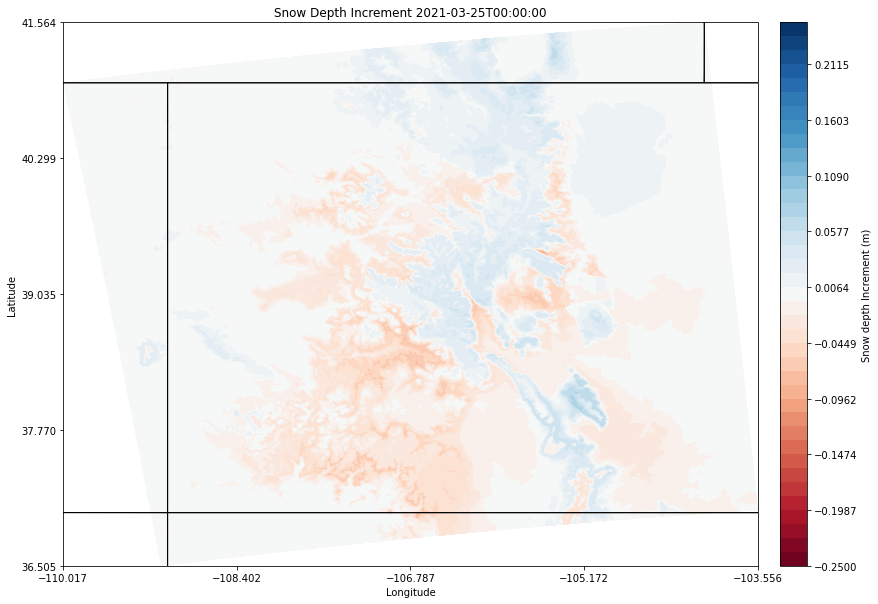

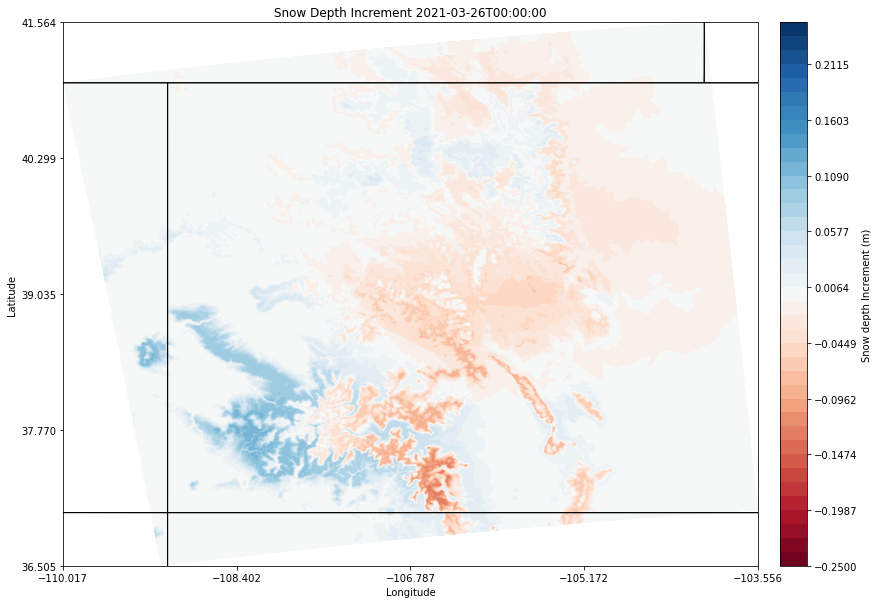

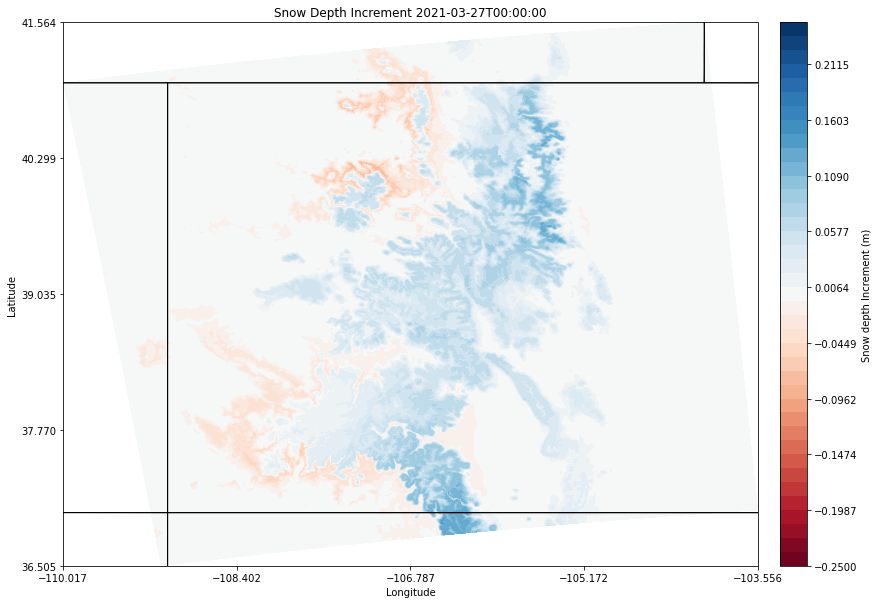

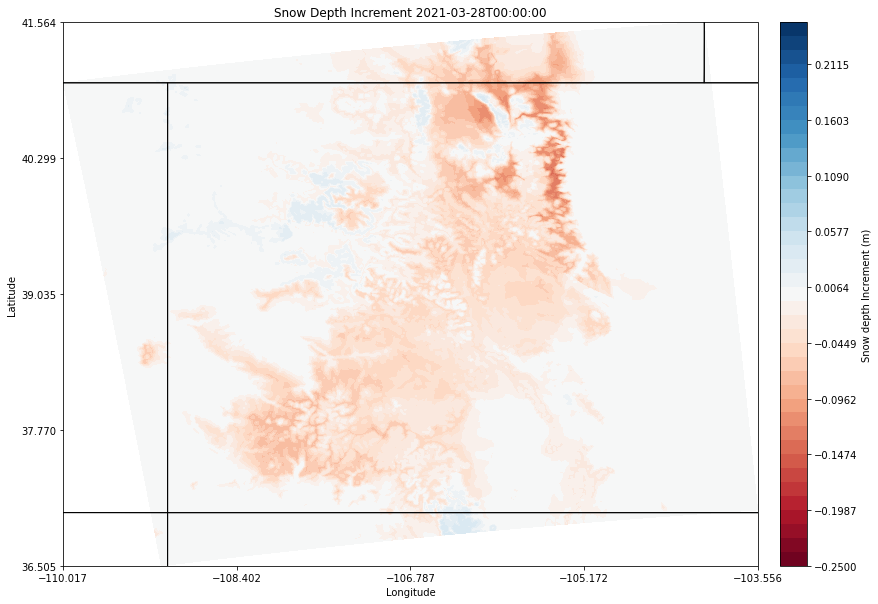

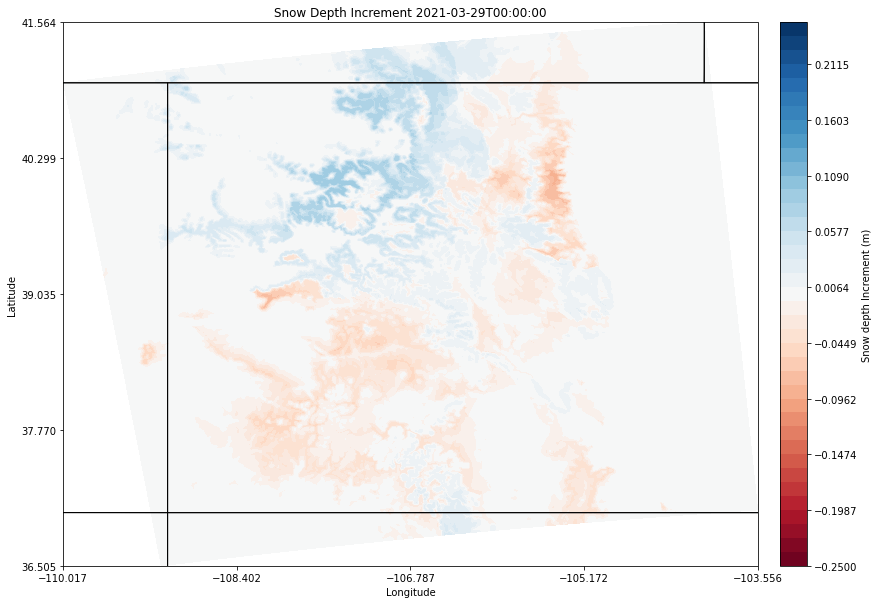

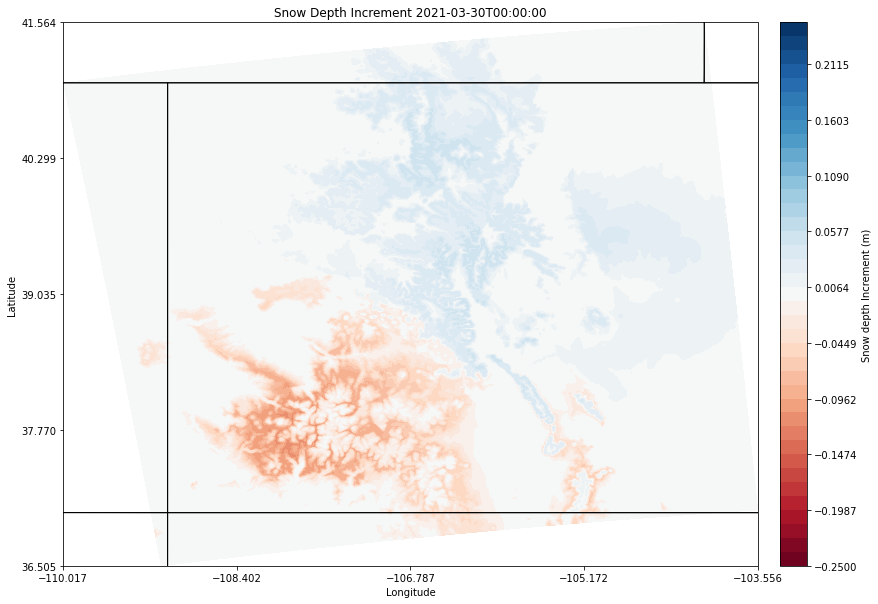

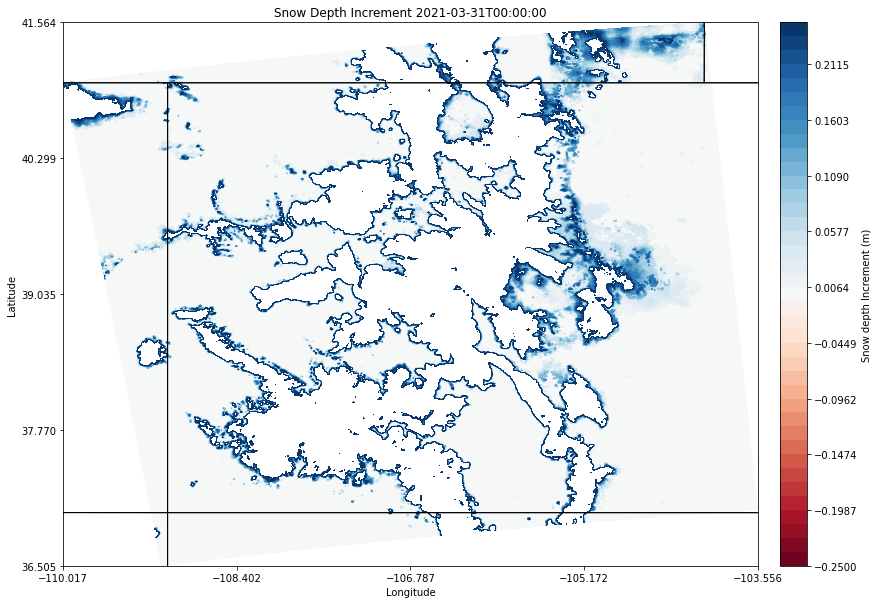

In [4]:
for startday in range (1, 32):
    endday = startday + 1
    startday = str(startday).zfill(2)
    endday = str(endday).zfill(2)

    datetime = '2021-03-' + startday + 'T00:00:00'
    window_begin = '2021-03-' + startday + 'T:00:00'
    window_end = '2021-03-' + endday + 'T00:00:00'
    metric = 'oman' #'ObsValue'
    field = 'snow_depth'
    units = 'm'
    output_path = './figures/'
    plotformat = 'png'

    colmin = None
    colmax = None

    field_file = os.path.join(exp_dir+'/'+'letkf_inc.lsm.ens.0.'+datetime+'Z.PT0S')

    print('\nOpening ', field_file, 'for reading')
    ncfile = netCDF4.Dataset(field_file, mode='r')

# Zero out array to fill with field
    fld = np.zeros((npy, npx))
    fld[:,:] = ncfile.variables["SNOWH"][:,:]

    fmin = -0.25 #np.min(fld)
    fmax = 0.25 #np.max(fld)
    levels = np.linspace(fmin,fmax,40)

    cmap = 'RdBu'

# Create two dimensional contour plot of HGT

# Set the projection
    projection = ccrs.PlateCarree()

# Create figure to hold plot
    fig = plt.figure(figsize=(20, 10))

# Just one subplot for now
    ax = fig.add_subplot(1, 1, 1, projection=projection)

    # Contour the field
    im = ax.contourf(lons, lats, fld,
                     transform=projection,
                     cmap=cmap,
                     levels=levels)

# Add coast lines to the plot
    ax.coastlines()

    ax.add_feature(cartopy.feature.STATES)

# Add labels to the plot
    ax.set_xticks(np.linspace(np.min(lons), np.max(lons), 5), crs=projection)
    ax.set_yticks(np.linspace(np.min(lats), np.max(lats), 5), crs=projection)

    ax.set_xlabel("Longitude")
    ax.set_ylabel('Latitude')
    ax.set_title("Snow Depth Increment "+datetime)
#ax.set_global()

# Add a colorbar for the filled contour.
# colorbar
    cbar = plt.colorbar(im, ax=ax, pad=0.02, fraction=0.06,)
    if not units==None:
        cbar.ax.set_ylabel("Snow depth Increment (m)", fontsize=10)


# show plot
    savename = ('./pngs/Increment_March_21_'+datetime+'_inc.png')
    print(" Saving figure as", savename, "\n")
    plt.savefig(savename, facecolor='w', dpi = 400)

In [ ]:
png_dir = './pngs'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.startswith('Increment'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave('./inc_March21_movie.gif', images, fps = 1)